<a href="https://colab.research.google.com/github/phattp1229/MachineLearning/blob/main/MachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1/Clean Data and Exploratory Data Analysis**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler,RobustScaler
import scipy.stats as stats
import pylab
from statsmodels.regression.linear_model import OLS

In [ ]:
data = pd.read_csv('Metro_Interstate_Traffic_Volume.csv', keep_default_na=False)
data.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [ ]:
data.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [ ]:
data.shape

(48204, 9)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


There are 5 Numerical columns in the dataset out of that 3 columns have decimal values.
There are 4 Categorical columns in the dataset

In [ ]:
print(data.isnull().sum())


holiday                0
temp                   0
rain_1h                0
snow_1h                0
clouds_all             0
weather_main           0
weather_description    0
date_time              0
traffic_volume         0
dtype: int64


In [ ]:
# Perform statistical analysis
data.describe()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
count,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000
mean,281.205870,0.334264,0.000222,49.362231,3259.818355
std,13.338232,44.789133,0.008168,39.015750,1986.860670
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,272.160000,0.000000,0.000000,1.000000,1193.000000
50%,282.450000,0.000000,0.000000,64.000000,3380.000000
75%,291.806000,0.000000,0.000000,90.000000,4933.000000
max,310.070000,9831.300000,0.510000,100.000000,7280.000000


Giá trị trung bình (mean) và trung vị (median) của tất cả các cột giúp chúng ta nhận biết độ lệch (skewness) của dữ liệu.

Như chúng ta đã biết, khi:
Mean > Median → dữ liệu bị lệch phải (right skewed), cho thấy phần lớn giá trị nằm ở bên phải và có thể có các ngoại lệ (outliers) nằm bên trái của đường phân phối chuẩn.

Mean < Median → ngược lại, dữ liệu bị lệch trái (left skewed).

Trong trường hợp này, không có sự chênh lệch lớn giữa giá trị trung bình và trung vị, do đó cần phân tích thêm về các ngoại lệ (outliers) để hiểu rõ hơn.

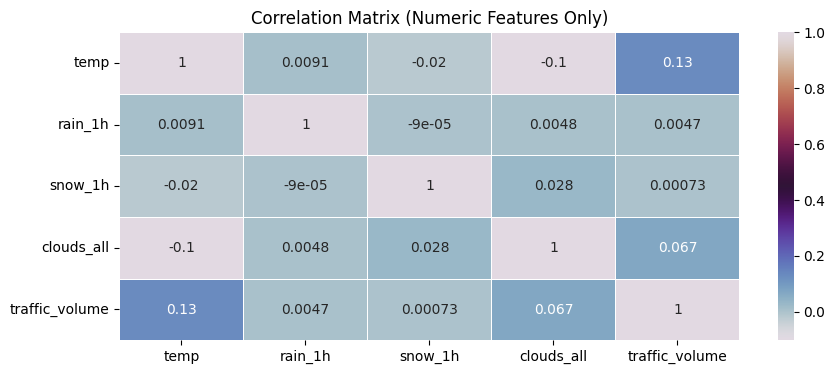

In [ ]:
#Correlation Plot (Biểu đồ tương quan)
numeric_cols = data.select_dtypes(include=['number'])  # chỉ lấy các cột kiểu số
corr = numeric_cols.corr()

plt.figure(figsize=(10, 4))
sns.heatmap(corr, annot=True, linewidths=0.5, cmap='twilight')
plt.title("Correlation Matrix (Numeric Features Only)")
plt.show()


Từ biểu đồ tương quan, có thể thấy rằng tất cả các cột đều có mối tương quan dương với biến đầu ra traffic_volume. Tuy nhiên, mức độ tương quan này không mạnh.

Mối tương quan với lưu lượng giao thông (traffic_volume): Biến temp (nhiệt độ) dường như có mối tương quan dương yếu với traffic_volume. Các biến số khác như rain_1h và snow_1h có mối tương quan rất yếu.

Mối tương quan giữa các biến dự báo: Có một số cặp biến dự báo có mối tương quan tương đối, nhưng không có mối tương quan nào quá mạnh (> 0.8 hoặc < -0.8) giữa các biến số dạng số (chỉ dựa trên biểu đồ hiện tại chỉ hiển thị các cột số ban đầu).

Nhìn chung, không có mối tương quan tuyến tính cực kỳ mạnh giữa các biến số dạng số ban đầu và traffic_volume.



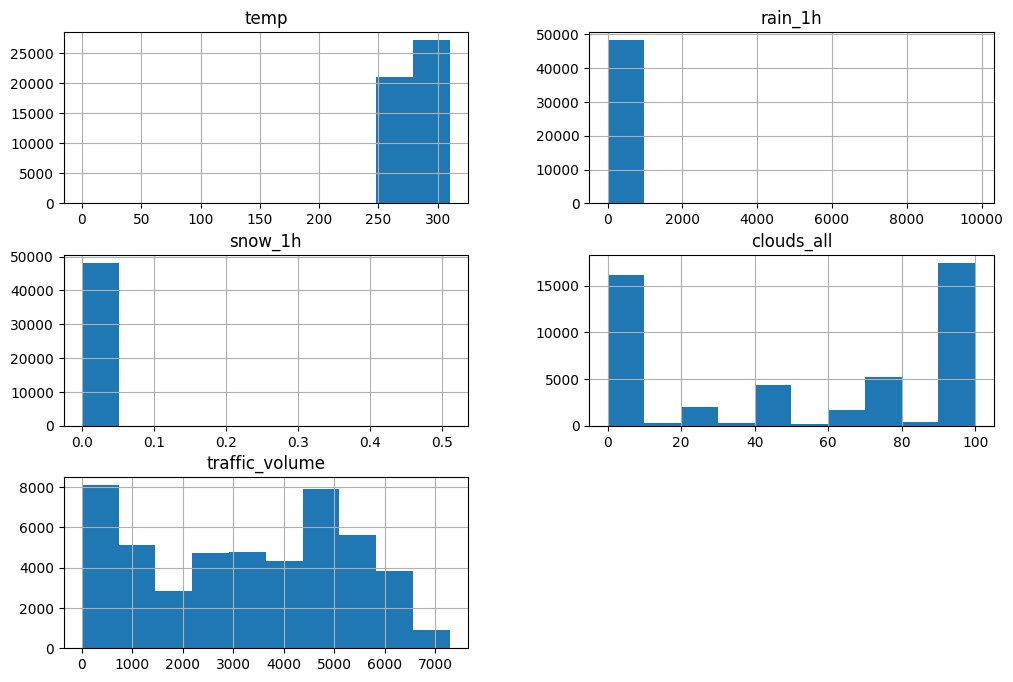

In [ ]:
#Visualizing the Numerical Categories (biểu đồ histogram (tần suất phân phối) )
data.hist(figsize=(12,8))
plt.show()

Chúng ta có thể thấy tất cả các danh mục số và phạm vi giá trị của chúng trong biểu đồ histogram.

  Trong cột clouds_all, nhiều giá trị hơn nằm trong phạm vi 90-100 và 0-10.

  Trong rain_1h và snow_1h có giá trị thập phân thấp và nằm trong phạm vi 0-5 và 0,0-0,05 tương ứng.

  Trong các cột temp, giá trị tối thiểu là khoảng 220 và giá trị tối đa là 310 và có phân phối tốt trong phạm vi 250-310.

  Trong cột traffic_volume, dữ liệu được phân phối tốt trong toàn bộ phạm vi.

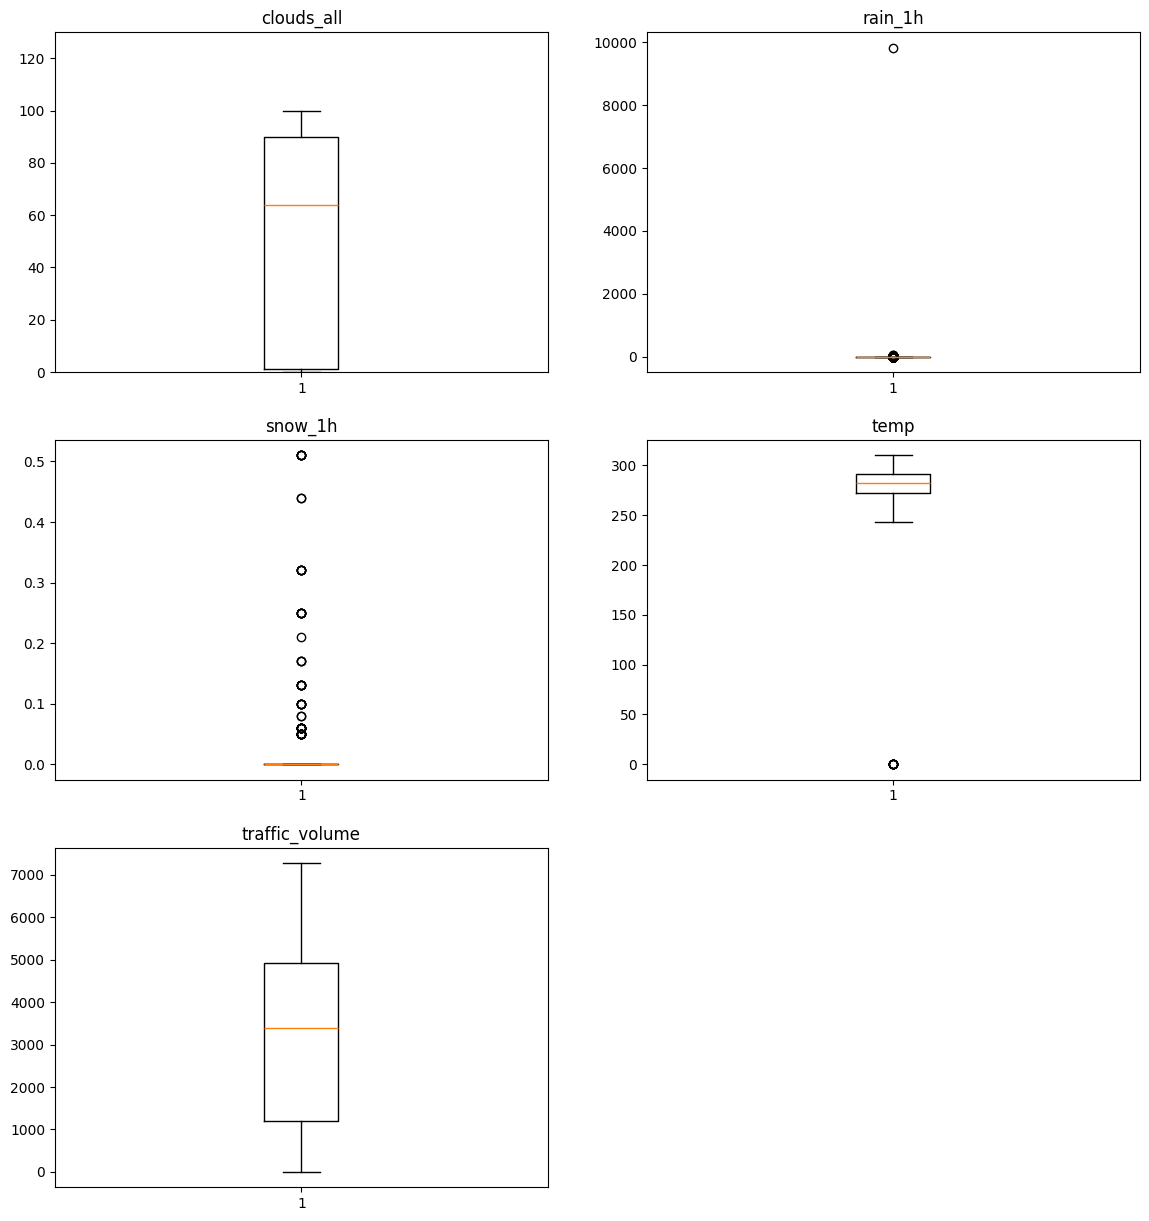

In [ ]:
#box plot for all the numeric values
plt.figure(figsize=(14,15))
plt.subplot(3,2,1)
plt.boxplot(data['clouds_all'])
plt.ylim(0,130)
plt.title('clouds_all')

plt.subplot(3,2,2)
plt.boxplot(data['rain_1h'])
plt.title('rain_1h')

plt.subplot(3,2,3)
plt.boxplot(data['snow_1h'])
plt.title('snow_1h')

plt.subplot(3,2,4)
plt.boxplot(data['temp'])
plt.title('temp')

plt.subplot(3,2,5)
plt.boxplot(data['traffic_volume'])
plt.title('traffic_volume')

plt.show()

clouds_all: Phân phối có vẻ lệch, có thể có một số ngoại lệ ở phía trên.

rain_1h: Hầu hết các giá trị rất gần 0, có nhiều ngoại lệ là các giá trị mưa lớn.

snow_1h: Tương tự rain_1h, hầu hết các giá trị rất gần 0, có ngoại lệ là các giá trị tuyết lớn.

temp: Phân phối có vẻ tương đối đối xứng và ít ngoại lệ hơn so với rain_1h và snow_1h.

traffic_volume: Phân phối khá trải đều, có thể có một số ngoại lệ ở cả hai đầu, nhưng ít điểm ngoại lệ rõ rệt như mưa hoặc tuyết.

**Outliers Detect**

In [ ]:
# rain_1h column
data[(data['rain_1h'] == data['rain_1h'].max())]

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
24872,None,302.11,9831.3,0.0,75,Rain,very heavy rain,2016-07-11 17:00:00,5535


Bằng cách trích xuất toàn bộ hàng dữ liệu, chúng ta có thể nhận thấy rằng dữ liệu là hợp lệ vì nó thuộc trường hợp "mưa rất to" (very heavy rain). Tuy nhiên, chúng ta cần so sánh với các bản ghi khác cũng có điều kiện thời tiết là "very heavy rain" để xác minh thêm.



In [ ]:
data[(data['weather_description']=='very heavy rain')]

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
7133,None,291.76,16.38,0.0,76,Rain,very heavy rain,2013-06-22 05:00:00,635
7179,None,295.82,44.45,0.0,76,Rain,very heavy rain,2013-06-24 11:00:00,4802
7664,None,292.82,19.90,0.0,20,Rain,very heavy rain,2013-07-14 05:00:00,542
7667,None,292.65,25.32,0.0,8,Rain,very heavy rain,2013-07-14 06:00:00,958
7670,None,292.87,21.42,0.0,90,Rain,very heavy rain,2013-07-14 07:00:00,1745
8247,None,289.10,55.63,0.0,68,Rain,very heavy rain,2013-08-07 02:00:00,315
10734,None,262.65,18.80,0.0,64,Rain,very heavy rain,2013-12-16 19:00:00,2755
10806,None,264.50,28.70,0.0,64,Rain,very heavy rain,2013-12-19 23:00:00,1190
14853,None,298.21,18.03,0.0,0,Rain,very heavy rain,2014-06-02 16:00:00,6443
16300,None,294.87,23.80,0.0,90,Rain,very heavy rain,2015-07-06 03:00:00,346


Ta có thể kết luận rằng đây là một điểm ngoại lệ (outlier) hoặc là lỗi nhập liệu khi so sánh với các dữ liệu liên quan khác. Cụ thể, các bản ghi có giá trị clouds_all cao hơn lại có lượng mưa (rain_1h) thấp hơn so với bản ghi này. Do đó, điểm dữ liệu này cần được xử lý hoặc loại bỏ.

In [ ]:
# temp column
data[(data['temp'] == data['temp'].min())]

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
11898,None,0.0,0.0,0.0,0,Clear,sky is clear,2014-01-31 03:00:00,361
11899,None,0.0,0.0,0.0,0,Clear,sky is clear,2014-01-31 04:00:00,734
11900,None,0.0,0.0,0.0,0,Clear,sky is clear,2014-01-31 05:00:00,2557
11901,None,0.0,0.0,0.0,0,Clear,sky is clear,2014-01-31 06:00:00,5150
11946,None,0.0,0.0,0.0,0,Clear,sky is clear,2014-02-02 03:00:00,291
11947,None,0.0,0.0,0.0,0,Clear,sky is clear,2014-02-02 04:00:00,284
11948,None,0.0,0.0,0.0,0,Clear,sky is clear,2014-02-02 05:00:00,434
11949,None,0.0,0.0,0.0,0,Clear,sky is clear,2014-02-02 06:00:00,739
11950,None,0.0,0.0,0.0,0,Clear,sky is clear,2014-02-02 07:00:00,962
11951,None,0.0,0.0,0.0,0,Clear,sky is clear,2014-02-02 08:00:00,1670


Trong cột nhiệt độ (temperature), các giá trị bằng 0 xuất hiện ở một số thời điểm nhất định và các mốc thời gian đó cũng liên tiếp nhau. Điều này cho thấy có thể nhiệt độ tại những thời điểm đó không được ghi nhận và đã được điền mặc định là 0. Vì vậy, chúng ta cần thay thế các giá trị này bằng những giá trị tương ứng (gần đúng) dựa trên các thời điểm lân cận.



**Handling Outliers**

In [ ]:
#rain_1h column
med_val = data['rain_1h'][(data['weather_description']=='very heavy rain') & (data['traffic_volume'] > 4000)].median()
data['rain_1h'][data['rain_1h'] == data['rain_1h'].max()] = med_val

In [ ]:
import calendar
from datetime import datetime
#Extracting month and year from the date column to get more information about the data
data['Year']  = [datetime.strptime(i,'%Y-%m-%d %H:%M:%S').year for i in data['date_time']]
data['Month'] = [datetime.strptime(i,'%Y-%m-%d %H:%M:%S').month for i in data['date_time']]
data['Day']   = [datetime.strptime(i,'%Y-%m-%d %H:%M:%S').day for i in data['date_time']]
data['Hour']  = [datetime.strptime(i,'%Y-%m-%d %H:%M:%S').hour for i in data['date_time']]

In [ ]:
#Outlier handling for Temp column
data[data['temp'] == 0.0]

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,Year,Month,Day,Hour
11898,None,0.0,0.0,0.0,0,Clear,sky is clear,2014-01-31 03:00:00,361,2014,1,31,3
11899,None,0.0,0.0,0.0,0,Clear,sky is clear,2014-01-31 04:00:00,734,2014,1,31,4
11900,None,0.0,0.0,0.0,0,Clear,sky is clear,2014-01-31 05:00:00,2557,2014,1,31,5
11901,None,0.0,0.0,0.0,0,Clear,sky is clear,2014-01-31 06:00:00,5150,2014,1,31,6
11946,None,0.0,0.0,0.0,0,Clear,sky is clear,2014-02-02 03:00:00,291,2014,2,2,3
11947,None,0.0,0.0,0.0,0,Clear,sky is clear,2014-02-02 04:00:00,284,2014,2,2,4
11948,None,0.0,0.0,0.0,0,Clear,sky is clear,2014-02-02 05:00:00,434,2014,2,2,5
11949,None,0.0,0.0,0.0,0,Clear,sky is clear,2014-02-02 06:00:00,739,2014,2,2,6
11950,None,0.0,0.0,0.0,0,Clear,sky is clear,2014-02-02 07:00:00,962,2014,2,2,7
11951,None,0.0,0.0,0.0,0,Clear,sky is clear,2014-02-02 08:00:00,1670,2014,2,2,8


tháng và ngày này có các giá trị bằng 0 trong cột temp. Vì vậy, cần trích xuất và phân tích chi tiết các bản ghi này.

In [ ]:
data[(data['Year'] == 2014) & (data['Month'] == 1 ) & (data['Day'] == 31)].head(10)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,Year,Month,Day,Hour
11895,None,255.93,0.0,0.0,0,Clear,sky is clear,2014-01-31 00:00:00,644,2014,1,31,0
11896,None,255.93,0.0,0.0,0,Clear,sky is clear,2014-01-31 01:00:00,390,2014,1,31,1
11897,None,255.93,0.0,0.0,0,Clear,sky is clear,2014-01-31 02:00:00,313,2014,1,31,2
11898,None,0.00,0.0,0.0,0,Clear,sky is clear,2014-01-31 03:00:00,361,2014,1,31,3
11899,None,0.00,0.0,0.0,0,Clear,sky is clear,2014-01-31 04:00:00,734,2014,1,31,4
11900,None,0.00,0.0,0.0,0,Clear,sky is clear,2014-01-31 05:00:00,2557,2014,1,31,5
11901,None,0.00,0.0,0.0,0,Clear,sky is clear,2014-01-31 06:00:00,5150,2014,1,31,6
11902,None,255.93,0.0,0.0,0,Clear,sky is clear,2014-01-31 07:00:00,5363,2014,1,31,7
11903,None,255.93,0.0,0.0,0,Clear,sky is clear,2014-01-31 08:00:00,5269,2014,1,31,8
11904,None,255.93,0.0,0.0,0,Clear,sky is clear,2014-01-31 09:00:00,4721,2014,1,31,9


Ta có thể thấy nhiệt độ duy trì ổn định từ khung giờ 0 đến 9, vì vậy ta sẽ thay thế các giá trị nhiệt độ bằng 0 bằng giá trị 255.93.

In [ ]:
data['temp'][(data['Day'] == 31) & (data['temp'] == 0.0)] = 255.93
data[(data['Year'] == 2014) & (data['Month'] == 2 ) & (data['Day'] == 2)].head(10)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,Year,Month,Day,Hour
11943,None,255.59,0.0,0.0,0,Clear,sky is clear,2014-02-02 00:00:00,1143,2014,2,2,0
11944,None,255.48,0.0,0.0,0,Clear,sky is clear,2014-02-02 01:00:00,695,2014,2,2,1
11945,None,255.37,0.0,0.0,0,Clear,sky is clear,2014-02-02 02:00:00,539,2014,2,2,2
11946,None,0.00,0.0,0.0,0,Clear,sky is clear,2014-02-02 03:00:00,291,2014,2,2,3
11947,None,0.00,0.0,0.0,0,Clear,sky is clear,2014-02-02 04:00:00,284,2014,2,2,4
11948,None,0.00,0.0,0.0,0,Clear,sky is clear,2014-02-02 05:00:00,434,2014,2,2,5
11949,None,0.00,0.0,0.0,0,Clear,sky is clear,2014-02-02 06:00:00,739,2014,2,2,6
11950,None,0.00,0.0,0.0,0,Clear,sky is clear,2014-02-02 07:00:00,962,2014,2,2,7
11951,None,0.00,0.0,0.0,0,Clear,sky is clear,2014-02-02 08:00:00,1670,2014,2,2,8
11952,None,255.62,0.0,0.0,0,Clear,sky is clear,2014-02-02 09:00:00,2506,2014,2,2,9


Trong tháng 2, nhiệt độ có xu hướng tăng dần, vì vậy chúng ta cần thay thế các giá trị bằng 0 theo cùng một cách tăng dần như vậy.

In [ ]:
np.round(np.linspace(255.41,255.62,6,endpoint=False),2)

array([255.41, 255.44, 255.48, 255.52, 255.55, 255.58])

In [ ]:
data['temp'][data['temp'] == 0] = [i for i in np.round(np.linspace(255.41,255.62,6,endpoint=False),2)]
data.drop('date_time',axis=1,inplace=True)
data = data[['holiday','temp','rain_1h','snow_1h','Year','Month','Day','Hour','weather_main','weather_description','traffic_volume']]
data.head()

,holiday,temp,rain_1h,snow_1h,Year,Month,Day,Hour,weather_main,weather_description,traffic_volume
0,None,288.28,0.0,0.0,2012,10,2,9,Clouds,scattered clouds,5545
1,None,289.36,0.0,0.0,2012,10,2,10,Clouds,broken clouds,4516
2,None,289.58,0.0,0.0,2012,10,2,11,Clouds,overcast clouds,4767
3,None,290.13,0.0,0.0,2012,10,2,12,Clouds,overcast clouds,5026
4,None,291.14,0.0,0.0,2012,10,2,13,Clouds,broken clouds,4918


# **2/Pre Processing** ( Tiền xử lý )

In [ ]:
data.head()

,holiday,temp,rain_1h,snow_1h,Year,Month,Day,Hour,weather_main,weather_description,traffic_volume
0,None,288.28,0.0,0.0,2012,10,2,9,Clouds,scattered clouds,5545
1,None,289.36,0.0,0.0,2012,10,2,10,Clouds,broken clouds,4516
2,None,289.58,0.0,0.0,2012,10,2,11,Clouds,overcast clouds,4767
3,None,290.13,0.0,0.0,2012,10,2,12,Clouds,overcast clouds,5026
4,None,291.14,0.0,0.0,2012,10,2,13,Clouds,broken clouds,4918


In [ ]:
data.tail()

,holiday,temp,rain_1h,snow_1h,Year,Month,Day,Hour,weather_main,weather_description,traffic_volume
48199,None,283.45,0.0,0.0,2018,9,30,19,Clouds,broken clouds,3543
48200,None,282.76,0.0,0.0,2018,9,30,20,Clouds,overcast clouds,2781
48201,None,282.73,0.0,0.0,2018,9,30,21,Thunderstorm,proximity thunderstorm,2159
48202,None,282.09,0.0,0.0,2018,9,30,22,Clouds,overcast clouds,1450
48203,None,282.12,0.0,0.0,2018,9,30,23,Clouds,overcast clouds,954


There are three categorical variables present in the dataset. we need to convert it into numerical before applying it to linear regression and KNN Model.

In [ ]:
#Using Label Encoder . It assigns a numerical value for each category
le =LabelEncoder()
Holiday_labels = le.fit_transform(data['holiday'])
{index: label for index , label in enumerate(le.classes_)}

{0: 'Christmas Day',
 1: 'Columbus Day',
 2: 'Independence Day',
 3: 'Labor Day',
 4: 'Martin Luther King Jr Day',
 5: 'Memorial Day',
 6: 'New Years Day',
 7: 'None',
 8: 'State Fair',
 9: 'Thanksgiving Day',
 10: 'Veterans Day',
 11: 'Washingtons Birthday'}

There are 11 Unique values in the column holiday and every value is assigned with a numerical value.

In [ ]:
#For weather_main column
weather_main = le.fit_transform(data['weather_main'])
{index: label for index , label in enumerate(le.classes_)}

{0: 'Clear',
 1: 'Clouds',
 2: 'Drizzle',
 3: 'Fog',
 4: 'Haze',
 5: 'Mist',
 6: 'Rain',
 7: 'Smoke',
 8: 'Snow',
 9: 'Squall',
 10: 'Thunderstorm'}

In [ ]:
#For weather_description column
weather_description = le.fit_transform(data['weather_description'])
{index: label for index , label in enumerate(le.classes_)}

{0: 'SQUALLS',
 1: 'Sky is Clear',
 2: 'broken clouds',
 3: 'drizzle',
 4: 'few clouds',
 5: 'fog',
 6: 'freezing rain',
 7: 'haze',
 8: 'heavy intensity drizzle',
 9: 'heavy intensity rain',
 10: 'heavy snow',
 11: 'light intensity drizzle',
 12: 'light intensity shower rain',
 13: 'light rain',
 14: 'light rain and snow',
 15: 'light shower snow',
 16: 'light snow',
 17: 'mist',
 18: 'moderate rain',
 19: 'overcast clouds',
 20: 'proximity shower rain',
 21: 'proximity thunderstorm',
 22: 'proximity thunderstorm with drizzle',
 23: 'proximity thunderstorm with rain',
 24: 'scattered clouds',
 25: 'shower drizzle',
 26: 'shower snow',
 27: 'sky is clear',
 28: 'sleet',
 29: 'smoke',
 30: 'snow',
 31: 'thunderstorm',
 32: 'thunderstorm with drizzle',
 33: 'thunderstorm with heavy rain',
 34: 'thunderstorm with light drizzle',
 35: 'thunderstorm with light rain',
 36: 'thunderstorm with rain',
 37: 'very heavy rain'}

In [ ]:
#Applying it in the primary dataset
data['holiday'] = le.fit_transform(data['holiday'])
data['weather_main'] = le.fit_transform(data['weather_main'])
data['weather_description'] = le.fit_transform(data['weather_description'])
data.head()

,holiday,temp,rain_1h,snow_1h,Year,Month,Day,Hour,weather_main,weather_description,traffic_volume
0,7,288.28,0.0,0.0,2012,10,2,9,1,24,5545
1,7,289.36,0.0,0.0,2012,10,2,10,1,2,4516
2,7,289.58,0.0,0.0,2012,10,2,11,1,19,4767
3,7,290.13,0.0,0.0,2012,10,2,12,1,19,5026
4,7,291.14,0.0,0.0,2012,10,2,13,1,2,4918


In [ ]:
data.to_csv('Metro-Interstate-Traffic-Volume-Encoded.csv',header=True,index=False)

# **Data Scaling (chuẩn hóa dữ liệu)**

Dataset will contain columns highly varying in magnitudes, units and range. Scaling it will bring it to a Uniform Range.

There are three scaling types:

     Standard Scaler: Z-score Transformation -> Linear Regression
     MinMax Scalar  : Uses minimum and maximum value for transformation
     Robust Scalar  : Uses IQR for transformation

In [ ]:
#Standard Scalar
stdscalar = StandardScaler()
data_stdscalar = stdscalar.fit_transform(data)
data_stdscalar = pd.DataFrame(data_stdscalar,columns=data.columns)
data_stdscalar.head()

,holiday,temp,rain_1h,snow_1h,Year,Month,Day,Hour,weather_main,weather_description,traffic_volume
0,0.015856,0.552256,-0.129524,-0.027228,-1.855294,1.02758,-1.574903,-0.345548,-0.566905,0.831600,1.150159
1,0.015856,0.637205,-0.129524,-0.027228,-1.855294,1.02758,-1.574903,-0.201459,-0.566905,-1.621016,0.632251
2,0.015856,0.654509,-0.129524,-0.027228,-1.855294,1.02758,-1.574903,-0.057371,-0.566905,0.274187,0.758582
3,0.015856,0.697770,-0.129524,-0.027228,-1.855294,1.02758,-1.574903,0.086718,-0.566905,0.274187,0.888940
4,0.015856,0.777214,-0.129524,-0.027228,-1.855294,1.02758,-1.574903,0.230807,-0.566905,-1.621016,0.834582


In [ ]:
#MinMax Scalar
MinMax = MinMaxScaler()
data_MinMax = MinMax.fit_transform(data)
data_MinMax = pd.DataFrame(data_MinMax,columns=data.columns)
data_MinMax.head()

,holiday,temp,rain_1h,snow_1h,Year,Month,Day,Hour,weather_main,weather_description,traffic_volume
0,0.636364,0.673215,0.0,0.0,0.0,0.818182,0.033333,0.391304,0.1,0.648649,0.761676
1,0.636364,0.689412,0.0,0.0,0.0,0.818182,0.033333,0.434783,0.1,0.054054,0.620330
2,0.636364,0.692711,0.0,0.0,0.0,0.818182,0.033333,0.478261,0.1,0.513514,0.654808
3,0.636364,0.700960,0.0,0.0,0.0,0.818182,0.033333,0.521739,0.1,0.513514,0.690385
4,0.636364,0.716107,0.0,0.0,0.0,0.818182,0.033333,0.565217,0.1,0.054054,0.675549


In [ ]:
#Robust Scalar
Robust = RobustScaler()
data_Robust = Robust.fit_transform(data)
data_Robust = pd.DataFrame(data_Robust,columns=data.columns)
data_Robust.head()

,holiday,temp,rain_1h,snow_1h,Year,Month,Day,Hour,weather_main,weather_description,traffic_volume
0,0.0,0.296753,0.0,0.0,-1.333333,0.6,-0.933333,-0.166667,0.0,0.411765,0.578877
1,0.0,0.351726,0.0,0.0,-1.333333,0.6,-0.933333,-0.083333,0.0,-0.882353,0.303743
2,0.0,0.362924,0.0,0.0,-1.333333,0.6,-0.933333,0.000000,0.0,0.117647,0.370856
3,0.0,0.390919,0.0,0.0,-1.333333,0.6,-0.933333,0.083333,0.0,0.117647,0.440107
4,0.0,0.442329,0.0,0.0,-1.333333,0.6,-0.933333,0.166667,0.0,-0.882353,0.411230


# **3/Linear Regression Model and Assumption Validation (Mô hình Hồi quy Tuyến tính và Kiểm định giả định)**

In [ ]:
data.head()

,holiday,temp,rain_1h,snow_1h,Year,Month,Day,Hour,weather_main,weather_description,traffic_volume
0,7,288.28,0.0,0.0,2012,10,2,9,1,24,5545
1,7,289.36,0.0,0.0,2012,10,2,10,1,2,4516
2,7,289.58,0.0,0.0,2012,10,2,11,1,19,4767
3,7,290.13,0.0,0.0,2012,10,2,12,1,19,5026
4,7,291.14,0.0,0.0,2012,10,2,13,1,2,4918


# **Scaling the data for Linear Regression**

Các mô hình hồi quy tuyến tính hoạt động dựa trên việc tìm ra các trọng số (coefficients) cho mỗi đặc trưng (feature) để tối thiểu hóa sai số.

=> Scaling (co giãn dữ liệu) đưa tất cả các đặc trưng về một thang đo chung (ví dụ từ 0 đến 1 hoặc có giá trị trung bình là 0 và độ lệch chuẩn là 1). Điều này giúp mô hình đánh giá đúng tầm quan trọng của mỗi đặc trưng dựa trên mối quan hệ của nó với biến mục tiêu, chứ không phải vì đơn vị đo ban đầu của nó.

In [ ]:
# Khởi tạo một đối tượng StandardScaler – dùng để chuẩn hóa dữ liệu theo Z-score (tức đưa dữ liệu về trung bình 0, độ lệch chuẩn 1)
stdscale = StandardScaler()
data1 = stdscale.fit_transform(data) #tính toán mean và std của từng cột trong data , z = (x - mean) / std
data1 = pd.DataFrame(data1,columns=data.columns)

In [ ]:
X = data1.drop('traffic_volume',axis=1)
Y = data1['traffic_volume']

X: tất cả các đặc trưng đầu vào (features) ngoại trừ traffic_volume

Y: cột traffic_volume – là biến mục tiêu (target)

# **Fitting with the OLS model**

OLS là một phương pháp thống kê để tìm đường thẳng tốt nhất (mô hình tuyến tính) sao cho tổng bình phương sai số giữa dự đoán và giá trị thực tế là nhỏ nhất.

In [ ]:
#Huấn luyện mô hình hồi quy tuyến tính bằng Phương pháp Bình phương Tối thiểu (Ordinary Least Squares - OLS).
model = sm.OLS(Y,X).fit()
fittedvals = model.fittedvalues
residuals =model.resid

In [ ]:
rsq = model.rsquared
adj_rsq = model.rsquared_adj
print('R Squared :',round(rsq,4))
print('Adjusted R Squared :',round(adj_rsq,4))

R Squared : 0.138
Adjusted R Squared : 0.1378


# **Validating all the assumptions**

kiểm tra các giả định cơ bản của mô hình Linear Regression (OLS) để đảm bảo rằng mô hình là đáng tin cậy và hợp lệ.

=> Nếu muốn mô hình đáng tin, hiểu rõ ý nghĩa các biến → nên kiểm tra.

**1) Linear Relationship**

 Mối quan hệ giữa biến phụ thuộc và các biến độc lập là tuyến tính.

**  Rainbow Test :** Đây là một kiểm định thống kê để kiểm tra tính tuyến tính của mô hình hồi quy

  p value > 0.05 - Accept the Null

  p value < 0.05 - Reject the Null

In [ ]:
from statsmodels.stats.api import linear_rainbow,het_goldfeldquandt
stat = linear_rainbow(model)
stat

(np.float64(1.0200604102218669), np.float64(0.06158934737672389))

In [ ]:
if stat[1] > 0.05:
    print('The p value is',round(stat[1],4),' > 0.05. So Rejecting the Null')
else:
    print('The p value is',round(stat[1],4),' < 0.05. So Accepting the Null')

The p value is 0.0616  > 0.05. So Rejecting the Null


Vì p-value = 0.0616 > 0.05, bạn chưa có đủ bằng chứng để nói rằng mô hình sai tuyến tính.

=> Mô hình có thể được xem là tuyến tính — tức là thoả mãn giả định tuyến tính của Linear Regression.

**2) Normality**

Tất cả các biến đầu vào trong mô hình hồi quy nên có phân phối chuẩn đa biến (multivariate normal distribution).

**Evaluation Plot**

  Biểu đồ Phần dư (Residual Plot) được sử dụng để đánh giá tính tuyến tính của dữ liệu.

**Q-Q Plot (Quantile-Quantile plot) cho residuals**

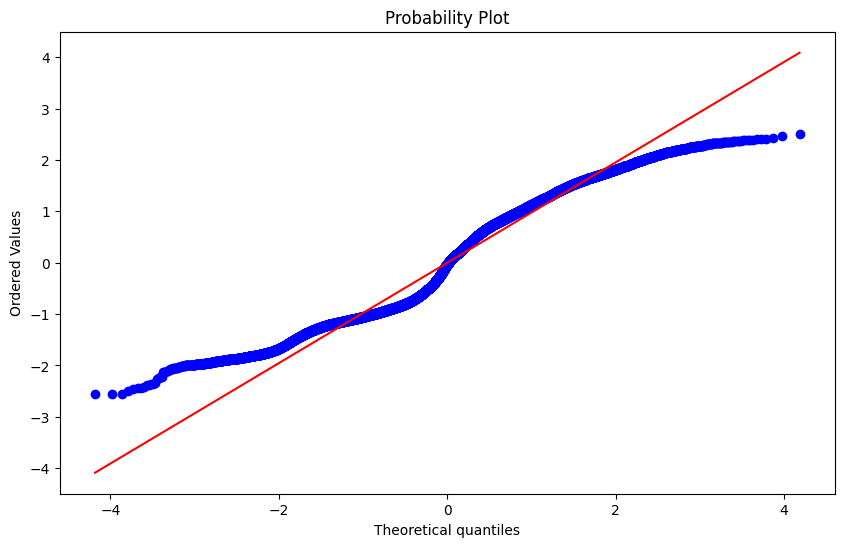

In [ ]:
st_residual = model.get_influence().resid_studentized_internal
plt.figure(figsize=(10,6))
stats.probplot(st_residual,dist='norm',plot=pylab)
plt.show()

Biểu đồ Q-Q cho phần dư giúp đánh giá giả định về tính chuẩn của sai số. Nếu hầu hết các điểm dữ liệu nằm gần và dọc theo đường chéo 45 độ, điều đó cho thấy phần dư có phân phối gần chuẩn. Sự lệch khỏi đường này ở hai đầu hoặc ở giữa cho thấy phân phối sai số có thể không chuẩn

**Test of Linearity**

  Null Hypothesis      - the data is following the Guassian curve

  Alternate Hypothesis - the data is not following the Guassian curve

In [ ]:
from scipy.stats import shapiro
stat = shapiro(st_residual)
stat

ShapiroResult(statistic=np.float64(0.954883106348231), pvalue=np.float64(3.045295794549839e-77))

In [ ]:
if stat[1] > 0.05:
    print('The p value is',round(stat[1],4),' > 0.05. So Rejecting the Null')
else:
    print('The p value is',round(stat[1],4),' < 0.05. So Accepting the Null')

The p value is 0.0  < 0.05. So Accepting the Null


Mục đích của "Test of Linearity" là để xác định xem mối quan hệ giữa biến phụ thuộc (target variable) và các biến độc lập (predictor variables) có thực sự là tuyến tính hay không.

**3) Multicollinearity**

Cần xác định vì Multicollinearity làm giảm độ tin cậy của mô hình hồi quy tuyến tính.

Hệ số lạm phát phương sai :

Giá trị VIF = 1: Không có tương quan

Giá trị VIF < 5: Trung bình

Giá trị VIF > 5, < 10: Cao

Giá trị VIF > 10: Rất cao nên loại bỏ biến

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
for i in range(0,len(X.columns)):
    print(data.columns[i] ,'\t', variance_inflation_factor(X.values,i))

holiday 	 1.0008701999409622
temp 	 1.1292345297264272
rain_1h 	 1.0483414175731256
snow_1h 	 1.0029057594976027
Year 	 1.0874499710123653
Month 	 1.1020678943916942
Day 	 1.0025456066419607
Hour 	 1.018440303568671
weather_main 	 1.065901692749399
weather_description 	 1.0425453056747023


Không có mối tương quan giữa các tính năng, tất cả các giá trị VIF đều nằm trong phạm vi 5, điều này cho thấy không có hiện tượng đa cộng tuyến

**4. Autocorrelation (Tự tương quan sai số)**

Tự tương quan xảy ra khi các phần dư không độc lập với nhau. Không nên có tự tương quan vì Sai số tại thời điểm này không được phụ thuộc sai số tại thời điểm khác.

In [ ]:
from  statsmodels.stats.stattools import durbin_watson
stat =durbin_watson(residuals)
stat
if stat != 2:
    print('The p value is',round(stat,4),' != 2. So Rejecting the Null')
else:
    print('The p value is',round(stat,4),' == 2. So Accepting the Null')

The p value is 0.2287  != 2. So Rejecting the Null


The p value is 0.2287  != 2. So Rejecting the Null

Có mối tương quan tích cực trong phần dư

# **4/Modeling Linear Regression**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [ ]:
data.head()

,holiday,temp,rain_1h,snow_1h,Year,Month,Day,Hour,weather_main,weather_description,traffic_volume
0,7,288.28,0.0,0.0,2012,10,2,9,1,24,5545
1,7,289.36,0.0,0.0,2012,10,2,10,1,2,4516
2,7,289.58,0.0,0.0,2012,10,2,11,1,19,4767
3,7,290.13,0.0,0.0,2012,10,2,12,1,19,5026
4,7,291.14,0.0,0.0,2012,10,2,13,1,2,4918


In [ ]:
X = data.drop('traffic_volume',axis=1)
Y = data['traffic_volume']

X: tất cả các đặc trưng đầu vào (features) ngoại trừ traffic_volume

Y: cột traffic_volume – là biến mục tiêu (target)

In [ ]:
#Train Test Split

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=0)

In [ ]:
# In số lượng mẫu trong tập huấn luyện
print(f"Training: {ytrain.shape[0]}")

# In số lượng mẫu trong tập kiểm tra

print(f"Test: {ytest.shape[0]}")

Training: 38563
Test: 9641


In [ ]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(xtrain,ytrain)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None)
pred = LR.predict(xtest)

**Evaluation Metrics**

In [ ]:
import sklearn.metrics as metrics
print('R Squared : ',metrics.r2_score(ytest,pred))
print('Mean Absolute Error : ',metrics.mean_absolute_error(ytest,pred))
print('Mean Squared Error : ',metrics.mean_squared_error(ytest,pred))
print('Root Mean Squared Error : ',np.sqrt(metrics.mean_squared_error(ytest,pred)))

R Squared :  0.1377462605480566
Mean Absolute Error :  1620.4223714266739
Mean Squared Error :  3372070.214663053
Root Mean Squared Error :  1836.319747392336


Khi đưa tất cả các đặc trưng vào mô hình, chúng ta chỉ thu được giá trị R² là xấp xỉ 0.14 (14%), tức là mô hình chỉ giải thích được 14% sự biến thiên của traffic_volume.
Nói cách khác, các đặc trưng hiện tại không giúp dự đoán tốt, và 86% còn lại là do yếu tố khác hoặc nhiễu chưa được mô hình nắm bắt.

**Creating a GRID search to find the best single feature**

Grid Search để tìm feature tốt nhất là quá trình:

👉 Thử từng đặc trưng (feature) một, huấn luyện mô hình trên mỗi đặc trưng, rồi so sánh độ chính xác (ví dụ R²).

→ Mục đích: Tìm feature đơn lẻ dự đoán tốt nhất cho biến mục tiêu.

In [ ]:
for i in range(len(data.columns)-1):
    X=  data[[data.columns[i]]]
    Y=  data[['traffic_volume']]
    xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size = 0.25,random_state = 0)
    LR.fit(xtrain,ytrain)
    pred = LR.predict(xtest)
    print(data.columns[i],': ',round(metrics.r2_score(ytest,pred),4))

holiday :  0.0006
temp :  0.0192
rain_1h :  -0.0
snow_1h :  -0.0001
Year :  -0.0002
Month :  0.0
Day :  -0.0001
Hour :  0.1278
weather_main :  0.0002
weather_description :  0.0041


Từ điểm R² ở trên, chỉ có 2 đặc trưng temp và Hour cho kết quả dự đoán tốt hơn.

→ Vì vậy, ta chọn 2 đặc trưng này làm cơ sở, rồi thêm dần các đặc trưng khác vào để cải thiện mô hình.

In [ ]:
for i in range(len(data.columns)-1):
    X=  data[['temp','Hour',data.columns[i]]]
    Y=  data[['traffic_volume']]
    xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size = 0.25,random_state = 0)
    LR.fit(xtrain,ytrain)
    pred = LR.predict(xtest)
    print(data.columns[i],round(metrics.r2_score(ytest,pred),4))

holiday 0.1378
temp 0.1376
rain_1h 0.1376
snow_1h 0.1375
Year 0.1376
Month 0.1385
Day 0.1376
Hour 0.1376
weather_main 0.1373
weather_description 0.1398


Đặc trưng tiếp theo có điểm R² cao nhất là weather_description, vì vậy ta sẽ thêm đặc trưng này vào mô hình trong vòng lặp tiếp theo để kiểm tra xem mô hình có cải thiện hay không.










In [ ]:
for i in range(len(data.columns)-1):
    X=  data[['temp','Hour','weather_description',data.columns[i]]]
    Y=  data[['traffic_volume']]
    xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size = 0.25,random_state = 0)
    LR.fit(xtrain,ytrain)
    pred = LR.predict(xtest)
    print(data.columns[i],round(metrics.r2_score(ytest,pred),4))

holiday 0.14
temp 0.1398
rain_1h 0.1399
snow_1h 0.1397
Year 0.1395
Month 0.1408
Day 0.1398
Hour 0.1398
weather_main 0.1397
weather_description 0.1398


Đặc trưng tiếp theo có điểm R² cao nhất là holiday, vì vậy ta sẽ thêm đặc trưng này vào mô hình trong vòng lặp tiếp theo để kiểm tra mức cải thiện của mô hình.

In [ ]:
for i in range(len(data.columns)-1):
    X=  data[['temp','Hour','weather_description','holiday',data.columns[i]]]
    Y=  data[['traffic_volume']]
    xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size = 0.25,random_state = 0)
    LR.fit(xtrain,ytrain)
    pred = LR.predict(xtest)
    print(data.columns[i],round(metrics.r2_score(ytest,pred),4))

holiday 0.14
temp 0.14
rain_1h 0.1401
snow_1h 0.1399
Year 0.1397
Month 0.1409
Day 0.14
Hour 0.14
weather_main 0.1399
weather_description 0.14


Chúng ta đã đạt được điểm số R² tương đương với mô hình gốc khi sử dụng toàn bộ đặc trưng.
Từ đó có thể kết luận rằng chỉ cần 4 đặc trưng ['temp', 'Hour', 'weather_description', 'holiday'] là đủ để dự đoán.

Bốn đặc trưng này đã đóng góp toàn bộ cho 14% độ biến thiên của biến phụ thuộc (traffic_volume) – nghĩa là các đặc trưng còn lại hầu như không cải thiện mô hình.

**Prepresentation**

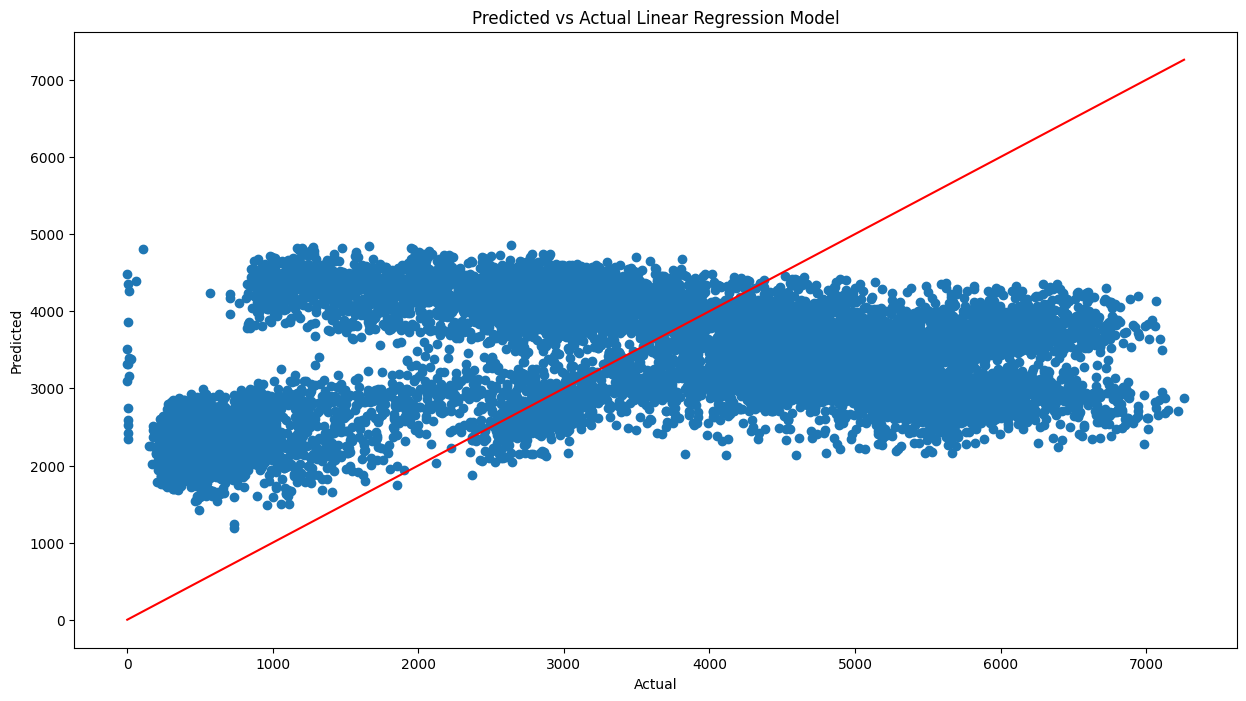

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
plt.scatter(ytest, pred)
lims = [ytest.min(), ytest.max()]  # hoặc pred.max(), nhưng tốt hơn là so sánh cùng chiều
plt.plot(lims, lims, color='red')
plt.title('Predicted vs Actual Linear Regression Model')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

Chúng ta có thể thấy rằng đường thẳng không thể nắm bắt được các mẫu trong dữ liệu

-> underfitting — tức là mô hình quá đơn giản, không nắm bắt được mối quan hệ phức tạp giữa các biến. Đường thẳng (Linear Regression) không thể "bắt kịp" xu hướng cong trong dữ liệu.

Để khắc phục tình trạng không khớp, chúng ta cần tăng độ phức tạp của mô hình

→ Cách làm: biến đổi đặc trưng bằng cách thêm các bậc cao hơn (polynomial features), ví dụ như temp², hour²,... để tạo ra mô hình hồi quy đa thức (Polynomial Regression).

In [ ]:
#(Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree=2)
data1 = data.copy()
X = data1.drop('traffic_volume',axis=1)
Y= data1['traffic_volume']
#Transforming the data
X = pf.fit_transform(X)
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=0)
LR = LinearRegression()
LR.fit(xtrain,ytrain)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None)
pred = LR.predict(xtest)
print('R Squared : ',metrics.r2_score(ytest,pred))
print('Mean Absolute Error : ',metrics.mean_absolute_error(ytest,pred))
print('Mean Squared Error : ',metrics.mean_squared_error(ytest,pred))
print('Root Mean Squared Error : ',np.sqrt(metrics.mean_squared_error(ytest,pred)))

R Squared :  0.656624290680182
Mean Absolute Error :  893.3409605672986
Mean Squared Error :  1340527.0850274765
Root Mean Squared Error :  1157.8113339518993


Bây giờ chúng ta có thể thấy bình phương R đã tăng lên và nó là 65 phần trăm cho thấy 65 % biến thể bị giảm sau khi chuyển đổi dữ liệu thành hồi quy đa thức

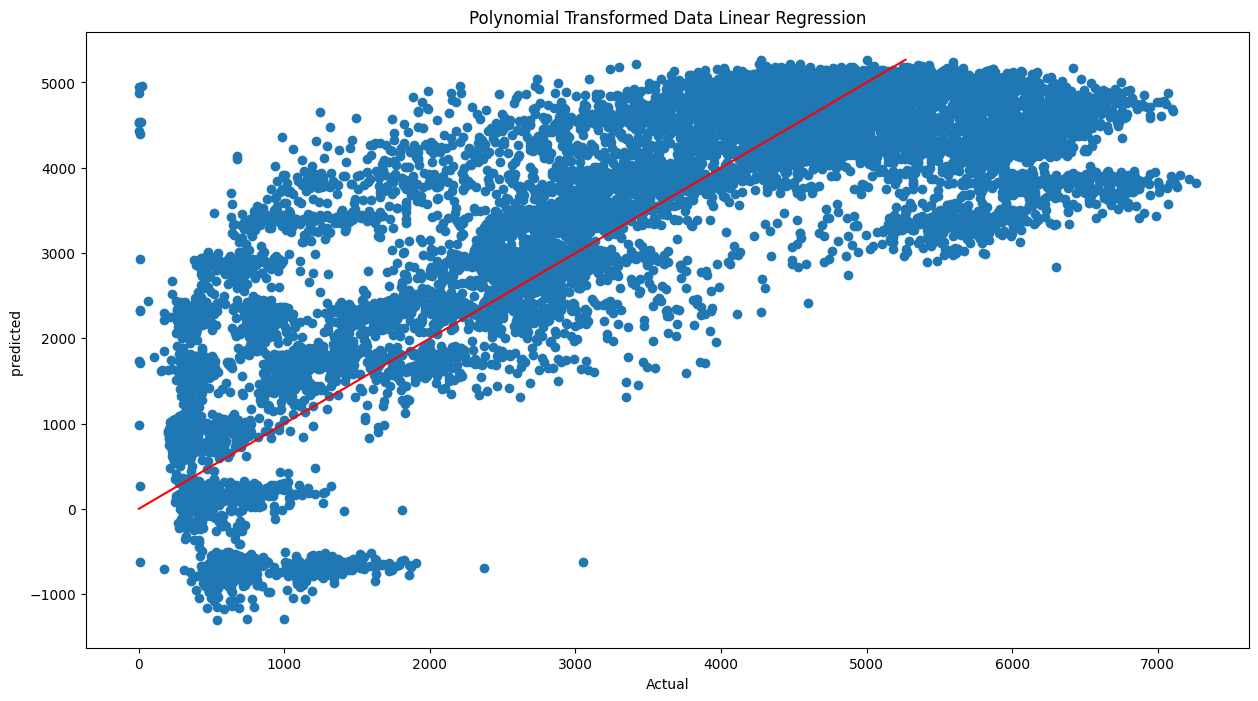

In [ ]:
plt.figure(figsize=(15,8))
plt.scatter (ytest, pred)
range = [ytest.min (), pred.max ()]
plt.plot (range, range, 'red')
plt.title('Polynomial Transformed Data Linear Regression')
plt.xlabel ('Actual')
plt.ylabel ('predicted ')
plt.show ()

chúng ta có thể thấy rằng đường thẳng vẫn chưa phù hợp nhất nhưng nó tốt hơn dữ liệu gốc. Dữ liệu đã chuyển đổi mang lại hiệu suất tốt hơn dữ liệu gốc.

# **5/Modeling Random Forest Method**

In [ ]:
data.head()

,holiday,temp,rain_1h,snow_1h,Year,Month,Day,Hour,weather_main,weather_description,traffic_volume
0,7,288.28,0.0,0.0,2012,10,2,9,1,24,5545
1,7,289.36,0.0,0.0,2012,10,2,10,1,2,4516
2,7,289.58,0.0,0.0,2012,10,2,11,1,19,4767
3,7,290.13,0.0,0.0,2012,10,2,12,1,19,5026
4,7,291.14,0.0,0.0,2012,10,2,13,1,2,4918


In [ ]:
X = data.drop('traffic_volume',axis=1)
Y = data['traffic_volume']
#Train Test Split
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=0)

In [ ]:
print(f"Training: {ytrain.shape[0]}")
print(f"Test: {ytest.shape[0]}")

Training: 38563
Test: 9641


In [ ]:
from sklearn.ensemble import RandomForestRegressor
RT = RandomForestRegressor()
RT.fit(xtrain,ytrain)
pred = RT.predict(xtest)
print('R Squared : ',metrics.r2_score(ytest,pred))
print('Mean Absolute Error : ',metrics.mean_absolute_error(ytest,pred))
print('Mean Squared Error : ',metrics.mean_squared_error(ytest,pred))
print('Root Mean Squared Error : ',np.sqrt(metrics.mean_squared_error(ytest,pred)))

R Squared :  0.8326445686223037
Mean Absolute Error :  521.5679441966602
Mean Squared Error :  654487.4664962452
Root Mean Squared Error :  809.0039965885492


R^2 =0.83: tức là 83% biến thiên trong lưu lượng xe có thể được giải thích bởi mô hình (các feature đã chọn).

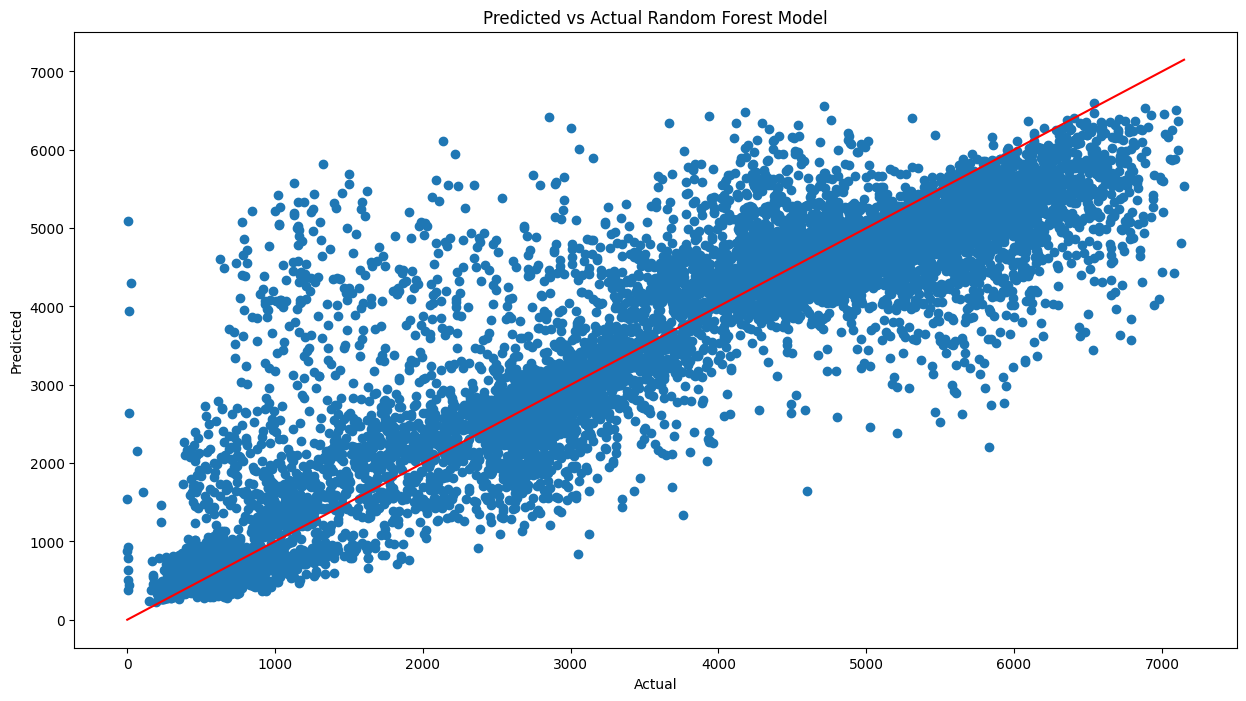

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
plt.scatter(ytest, pred)
lims = [ytest.min(), ytest.max()]
plt.plot(lims, lims, color='red')
plt.title('Predicted vs Actual Random Forest Model')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

"Biểu đồ 'Predicted vs Actual' cho mô hình Random Forest cho thấy rằng các điểm dữ liệu tập trung rất chặt chẽ xung quanh đường chéo màu đỏ (y=x). Điều này chứng tỏ mô hình Random Forest có khả năng dự đoán lưu lượng giao thông với độ chính xác cao hơn nhiều so với mô hình Hồi quy Tuyến tính đơn giản. Mức độ tập trung gần đường thẳng cho thấy sai số dự đoán của mô hình Random Forest là tương đối nhỏ."

Mô hình Random Forest mà không có bất kỳ siêu đồng hồ đo nào cho 83 % điểm R bình phương. Hãy thử tìm HyperParameter tốt nhất cho mô hình bằng cách sử dụng tìm kiếm lưới

**Grid Search for Hyper Parameter**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Khởi tạo mô hình Random Forest (chưa fit)
rf = RandomForestRegressor(random_state=0) # Sử dụng cùng random_state nếu cần

# Định nghĩa không gian tham số
parameter_grid = {
    'max_depth': np.arange(1, 10),
    'n_estimators': np.arange(1, 15) # Lưu ý: n_estimators 1-15 là rất nhỏ cho RF thực tế, nên tăng lên (ví dụ 50-200). Nhưng để chạy nhanh cho ví dụ thì có thể dùng 1-15.
    #'min_samples_split': [2, 5, 10], # Có thể thêm các tham số khác
    #'min_samples_leaf': [1, 2, 4]
}

# Khởi tạo GridSearchCV
# cv=3 là hợp lý, nhưng có thể tăng lên 5 hoặc 10 nếu dữ liệu đủ lớn
GS = GridSearchCV(estimator=rf, param_grid=parameter_grid, cv=3, scoring='r2', n_jobs=-1) # scoring='r2' để tối ưu R-squared, n_jobs=-1 để dùng tất cả core

# Thực hiện Grid Search - CHỈ TRÊN TẬP HUẤN LUYỆN
GS.fit(xtrain, ytrain)

# In ra bộ siêu tham số tốt nhất
print("\nBộ siêu tham số tốt nhất tìm được:")
print(GS.best_params_)

# ---------- Đánh giá mô hình Random Forest cuối cùng với siêu tham số tốt nhất ----------
print("\nĐánh giá mô hình Random Forest cuối cùng với siêu tham số tốt nhất...")

# Khởi tạo mô hình Random Forest với siêu tham số tốt nhất
best_rf_model = RandomForestRegressor(**GS.best_params_, random_state=0)

# Huấn luyện mô hình cuối cùng trên TOÀN BỘ tập huấn luyện
best_rf_model.fit(xtrain, ytrain)

# Dự đoán trên tập kiểm tra
pred_tuned = best_rf_model.predict(xtest)

# Đánh giá hiệu suất
r2_tuned = metrics.r2_score(ytest, pred_tuned)
mae_tuned = metrics.mean_absolute_error(ytest, pred_tuned)
mse_tuned = metrics.mean_squared_error(ytest, pred_tuned)
rmse_tuned = np.sqrt(mse_tuned)

print(f'\nR Squared (Tuned RF): {r2_tuned}')
print(f'Mean Absolute Error (Tuned RF): {mae_tuned}')
print(f'Mean Squared Error (Tuned RF): {mse_tuned}')
print(f'Root Mean Squared Error (Tuned RF): {rmse_tuned}')



Bộ siêu tham số tốt nhất tìm được:
{'max_depth': np.int64(9), 'n_estimators': np.int64(14)}

Đánh giá mô hình Random Forest cuối cùng với siêu tham số tốt nhất...

R Squared (Tuned RF): 0.7937172386241366
Mean Absolute Error (Tuned RF): 603.6439279252344
Mean Squared Error (Tuned RF): 806723.0370912917
Root Mean Squared Error (Tuned RF): 898.1776200124849


Nhìn chung RandomForest là mô hình tốt hơn. Tất cả các điểm MAE, MSE, RMSE, R^2 đều tốt hơn khi so sánh với các mô hình khác. Vì nó ít có khả năng quá khớp khi so sánh với các mô hình khác nên có thể được sử dụng để dự đoán.